In [1]:
import pandas as pd
import matplotlib.pyplot as plt
file = r"C:\Users\admin\Desktop\basic_ML_workshop\basic_ML_workshop\data\fish_species_dataset\fish_data.csv"
df = pd.read_csv(file)

In [2]:
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


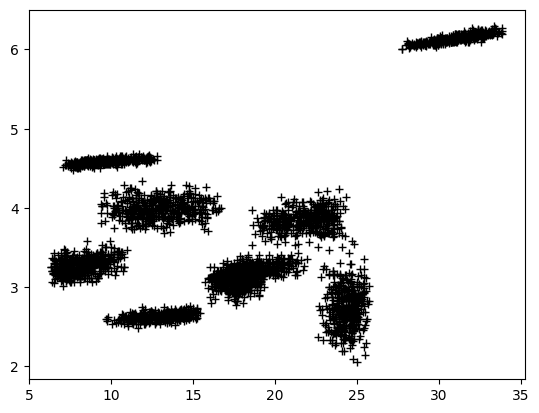

In [3]:
plt.plot(df['length'],df['weight'], 'k+')

In [6]:
species = list(set(df['species'].values))
print("\n".join(species))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'cyan', 'magenta']
#colors = colors + colors
color_mapping = dict(zip(species, colors))
print(color_mapping)

Puntius lateristriga
Polynemus paradiseus
Otolithoides biauritus
Otolithoides pama
Sillaginopsis panijus
Setipinna taty
Anabas testudineus
Pethia conchonius
Coilia dussumieri
{'Puntius lateristriga': 'blue', 'Polynemus paradiseus': 'orange', 'Otolithoides biauritus': 'green', 'Otolithoides pama': 'red', 'Sillaginopsis panijus': 'purple', 'Setipinna taty': 'brown', 'Anabas testudineus': 'pink', 'Pethia conchonius': 'cyan', 'Coilia dussumieri': 'magenta'}


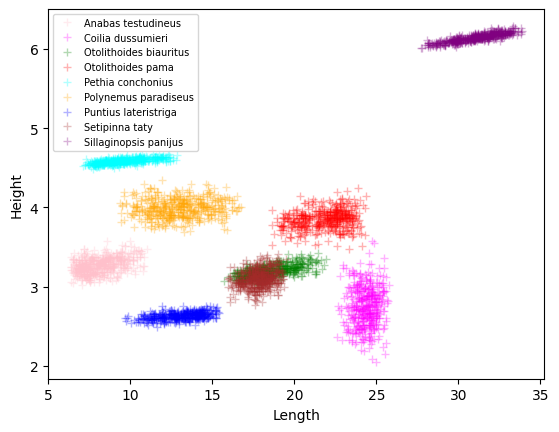

In [7]:
for group_name, group_df in df.groupby('species'):
    plt.plot(group_df['length'], group_df['weight'], marker='+', color=color_mapping[group_name], linewidth=0, alpha=0.3, label=group_name)
plt.xlabel('Length')
plt.ylabel('Height')
plt.legend(loc="upper left", fontsize=7)

Puntius lateristriga
Polynemus paradiseus
Otolithoides biauritus
Otolithoides pama
Sillaginopsis panijus
Setipinna taty
Anabas testudineus
Pethia conchonius
Coilia dussumieri
{'Puntius lateristriga': 'blue', 'Polynemus paradiseus': 'orange', 'Otolithoides biauritus': 'green', 'Otolithoides pama': 'red', 'Sillaginopsis panijus': 'purple', 'Setipinna taty': 'brown', 'Anabas testudineus': 'pink', 'Pethia conchonius': 'cyan', 'Coilia dussumieri': 'magenta'}


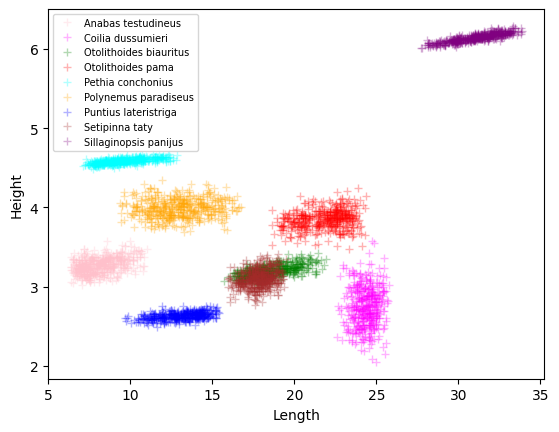

In [21]:
species = list(set(df['species'].values))
print("\n".join(species))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'cyan', 'magenta']
colors = colors + colors
color_mapping = dict(zip(species, colors))
print(color_mapping)
for group_name, group_df in df.groupby('species'):
    plt.plot(group_df['length'], group_df['weight'], marker='+', color=color_mapping[group_name], linewidth=0, alpha=0.3, label=group_name)
plt.xlabel('Length')
plt.ylabel('Height')
plt.legend(loc="upper left", fontsize=7)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[['length', 'weight']])
data_scaled.max()


np.float64(1.0)

In [16]:
from sklearn.cluster import KMeans
data_scaled.min()

np.float64(0.0)

In [11]:
clusterer = KMeans(n_clusters=8, max_iter=1000)

In [12]:
clusterer.fit(data_scaled)

KMeans(max_iter=1000)

In [18]:
pred = clusterer.predict(data_scaled)
df['pred'] = pred
df.head()

,species,length,weight,w_l_ratio,pred
0,Anabas testudineus,10.66,3.45,0.32,3
1,Anabas testudineus,6.91,3.27,0.47,3
2,Anabas testudineus,8.38,3.46,0.41,3
3,Anabas testudineus,7.57,3.36,0.44,3
4,Anabas testudineus,10.83,3.38,0.31,3


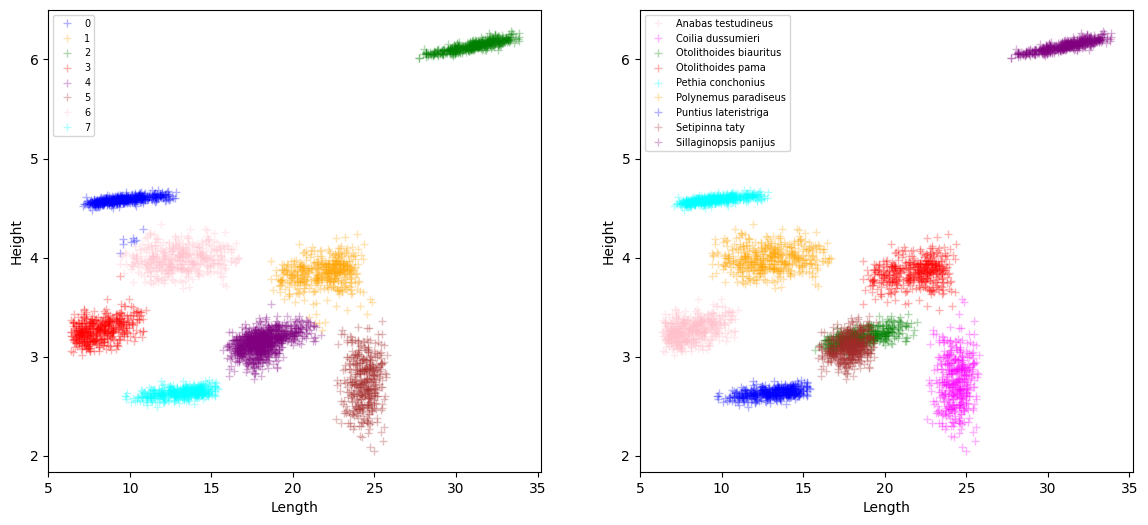

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
for i, (group_name, group_df) in enumerate(df.groupby('pred')):
    ax1.plot(group_df['length'], group_df['weight'], marker='+', color=colors[i], linewidth=0, alpha=0.3, label=group_name)
ax1.set_xlabel('Length')
ax1.set_ylabel('Height')
ax1.legend(loc="upper left", fontsize=7)


# original_plot
for group_name, group_df in df.groupby('species'):
    ax2.plot(group_df['length'], group_df['weight'], marker='+', color=color_mapping[group_name], linewidth=0, alpha=0.3, label=group_name)
ax2.set_xlabel('Length')
ax2.set_ylabel('Height')
ax2.legend(loc="upper left", fontsize=7)

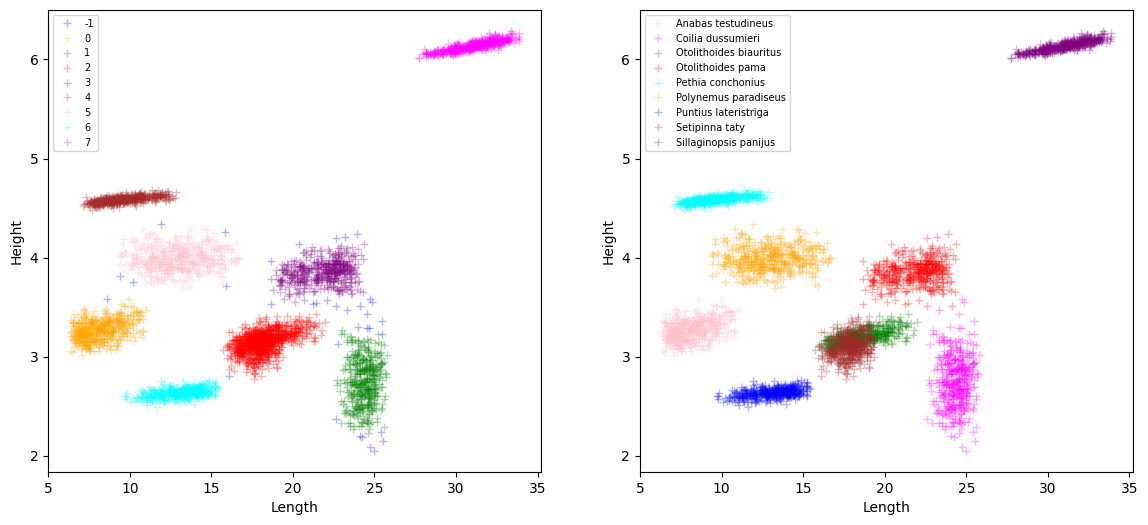

In [26]:
from sklearn.cluster import DBSCAN
db_clusterer_pred = DBSCAN(eps=0.020, min_samples=5).fit_predict(data_scaled)
df['db_pred'] = db_clusterer_pred
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
for i, (group_name, group_df) in enumerate(df.groupby('db_pred')):
    ax1.plot(group_df['length'], group_df['weight'], marker='+', color=colors[i], linewidth=0, alpha=0.3, label=group_name)
ax1.set_xlabel('Length')
ax1.set_ylabel('Height')
ax1.legend(loc="upper left", fontsize=7)


# original_plot
for group_name, group_df in df.groupby('species'):
    ax2.plot(group_df['length'], group_df['weight'], marker='+', color=color_mapping[group_name], linewidth=0, alpha=0.3, label=group_name)
ax2.set_xlabel('Length')
ax2.set_ylabel('Height')
ax2.legend(loc="upper left", fontsize=7)

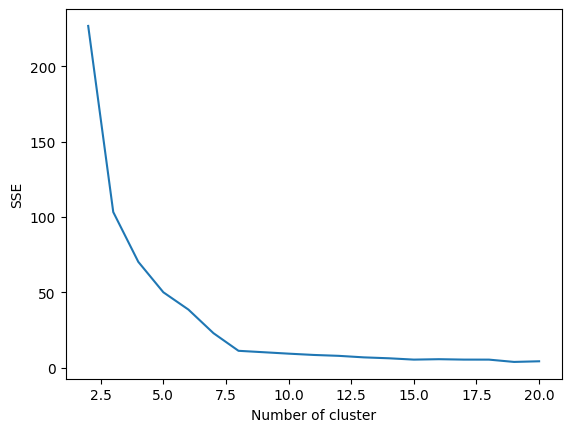

In [31]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[['length', 'weight']])
# Assuming data_scaled is already defined
sse = {}  # Initialize the dictionary for storing SSE values
silhouette = []  # Initialize the list for storing silhouette scores

for k in range(2, 21):
    clusterer = KMeans(n_clusters=k, max_iter=1000).fit(data_scaled)
    sse[k] = clusterer.inertia_  # Inertia: Sum of distances of samples to their closest cluster center
    label = clusterer.labels_
    silhouette.append(silhouette_score(data_scaled, label, metric='euclidean'))
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

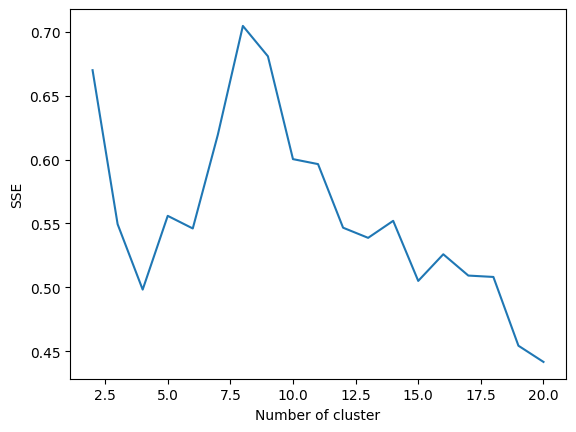

In [32]:
plt.figure()
plt.plot(range(2,21), silhouette)
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()